## Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
# matplotlib.use("pgf")
# matplotlib.rcParams.update({
#     "pgf.texsystem": "pdflatex",
#     'font.family': 'serif',
#     'text.usetex': True,
#     'pgf.rcfonts': False,
# })
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.metrics import R2Score
import keras.backend as K
from sklearn.metrics import mean_squared_error, explained_variance_score, r2_score
from statistics import stdev
import pandas_datareader as dr
from datetime import date
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns

to save the charts in latex

In [ ]:
# to download charts in latex friendly format
# !sudo apt install texlive-latex-extra

##Define Model

In [ ]:
# define date range for stock
start_date = "1950-01-01"
curr_date = date.today()

# number of days used to make prediction
trail = 730 # 2 years

# define neural network model
def model_regression():
    m = Sequential()
    m.add(LSTM(units=8, input_shape=(trail, 1)))
    m.add(Dense(units=8, activation='gelu'))
    m.add(Dense(units=1))
    return m

##Process Data

In [ ]:
# Fetch the data from Yahoo Finance
df = yf.download('^GSPC', start_date, curr_date)

raw_data = df.filter(['Close'])

raw_data = raw_data.replace(',', '', regex=True)

# normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = pd.DataFrame(scaler.fit_transform(raw_data))
scaled_data = scaled_data.rename(columns={0: 'Close'})

# use 75% of data to train model, 25% to test
train_data_size = int(0.75 * len(raw_data))
train_data = scaled_data[:train_data_size]

# subtract tail since its is needed to predict 1st day of test data
test_data = scaled_data[train_data_size-trail:]
test_data = test_data.rename(columns={0: 'Close'})

# convert train and test data to numpy arrays
train_data_array = np.array(train_data)
test_data_array = np.array(test_data)

# split train data into inputs and targets
x_train, y_train = [], []
for i in range(train_data_array.shape[0] - trail):
  x_train.append(train_data_array[i:i + trail])    # input will be closing prices from tail days
  y_train.append(train_data_array[i + trail, 0])   # target will be closing price one day after

x_train, y_train = np.array(x_train), np.array(y_train)

# split test data into inputs and targets
x_test, y_test = [], []
for i in range(test_data_array.shape[0] - trail):
  x_test.append(test_data_array[i:i + trail])
  y_test.append(test_data_array[i + trail])

# convert to numpy arrays to be read for training
x_test, y_test = np.array(x_test), np.array(y_test)

[*********************100%%**********************]  1 of 1 completed


##Initialize Batch Sizes and Optimization Algorithms

In [ ]:
from keras.optimizers import SGD, RMSprop, Adam
batch_sizes = [train_data_size, 1024, 512, 128]

# load optimization algorithms
def fetch_algs():
  plain = SGD(learning_rate = 0.001, momentum = 0.0, name = 'Plain')
  momentum = SGD(learning_rate = 0.001, momentum=0.9, name = 'Momentum')
  rmsprop = RMSprop(learning_rate = 0.001, name = 'RMSprop')
  adam = Adam(learning_rate = 0.001, name = 'Adam')

  return [plain, momentum, rmsprop, adam]


##Train Model

==================== BATCH SIZE = 14023, OPT_ALG = Plain ====================


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 8)                 320       
                                                                 
 dense (Dense)               (None, 8)                 72        
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 401 (1.57 KB)
Trainable params: 401 (1.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/30
1/1 [==============================] - 12s 12s/step - loss: 0.0011 - mean_squared_error: 0.0022 - mean_absolute_error: 0.0287 - mean_absolute_percentage_error: 47.7164
Epoch 2/30
1/1 [===============

<ipython-input-6-38dd5c54a165>:28: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


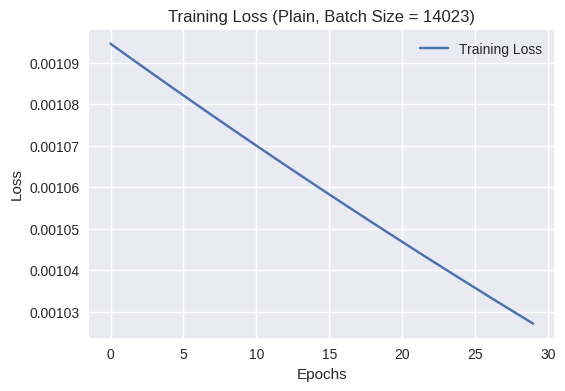

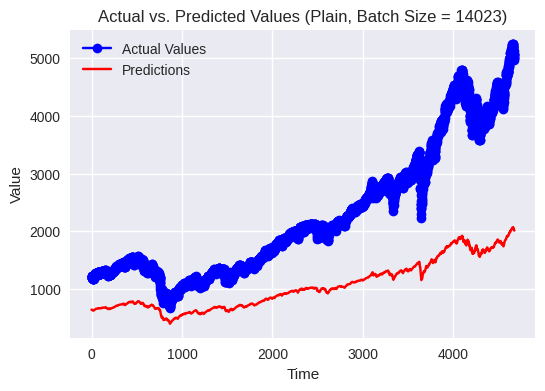

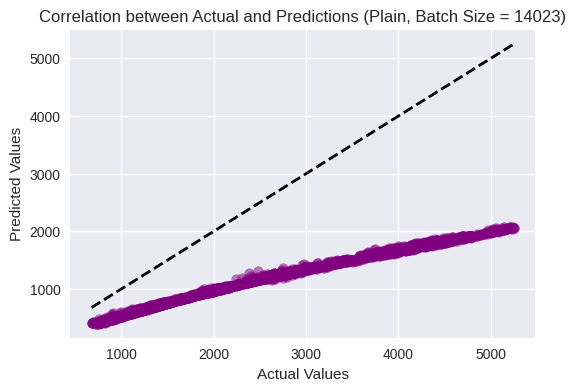

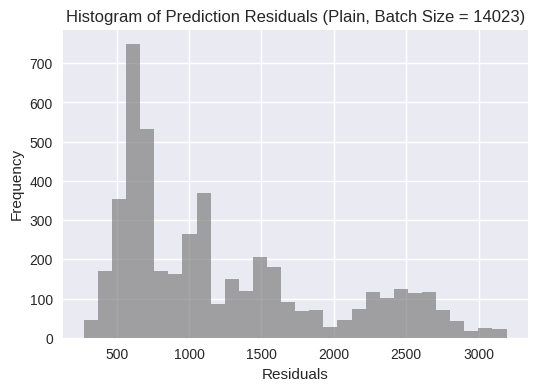

==================== ==================== ==================== ==================== ==================== ==================== ====================

==================== ==================== ==================== ==================== ==================== ==================== ====================


==================== BATCH SIZE = 14023, OPT_ALG = Momentum ====================


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 8)                 320       
                                                                 
 dense_2 (Dense)             (None, 8)                 72        
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 401 (1.57 KB)
Trainable params: 401 (1.57 KB)
Non-traina

<ipython-input-6-38dd5c54a165>:28: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


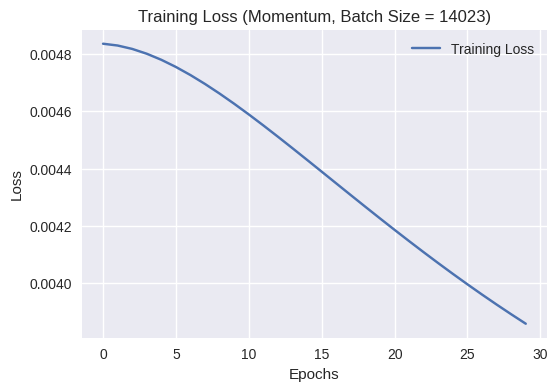

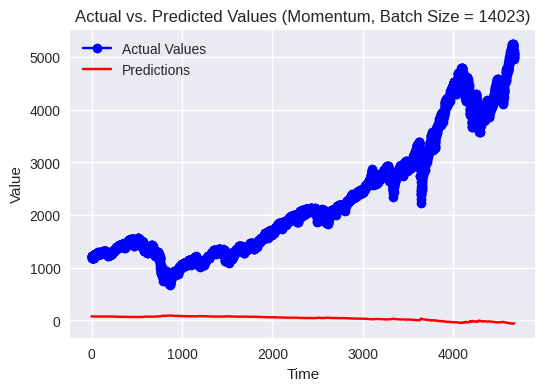

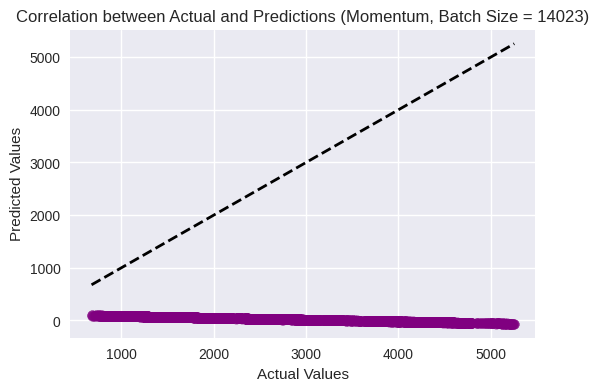

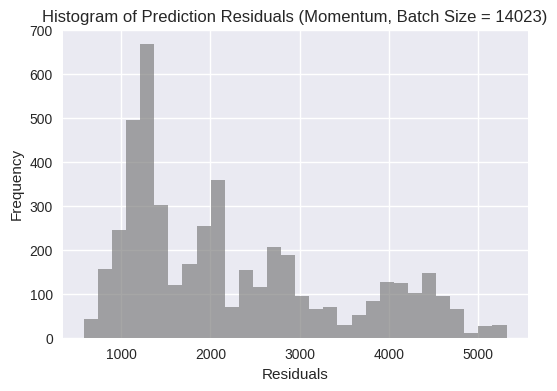

==================== ==================== ==================== ==================== ==================== ==================== ====================

==================== ==================== ==================== ==================== ==================== ==================== ====================


==================== BATCH SIZE = 14023, OPT_ALG = RMSprop ====================


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 8)                 320       
                                                                 
 dense_4 (Dense)             (None, 8)                 72        
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 401 (1.57 KB)
Trainable params: 401 (1.57 KB)
Non-trainab

<ipython-input-6-38dd5c54a165>:28: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


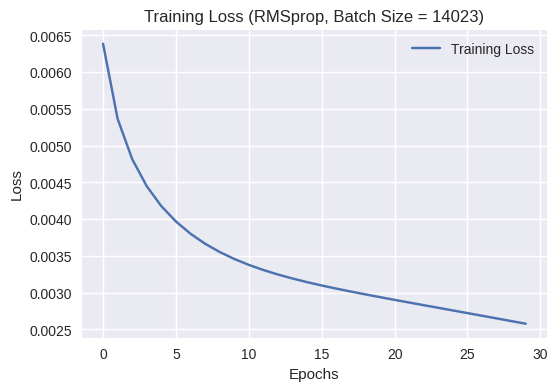

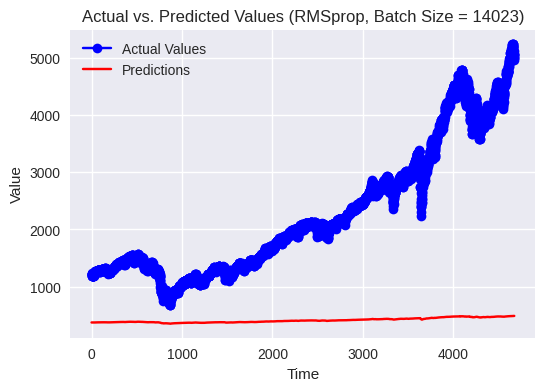

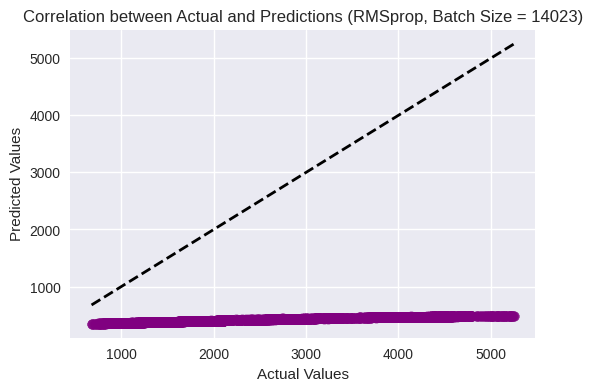

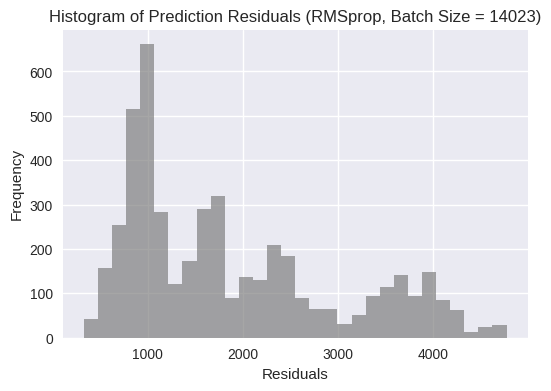

==================== ==================== ==================== ==================== ==================== ==================== ====================

==================== ==================== ==================== ==================== ==================== ==================== ====================


==================== BATCH SIZE = 14023, OPT_ALG = Adam ====================


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 8)                 320       
                                                                 
 dense_6 (Dense)             (None, 8)                 72        
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 401 (1.57 KB)
Trainable params: 401 (1.57 KB)
Non-trainable 

<ipython-input-6-38dd5c54a165>:28: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


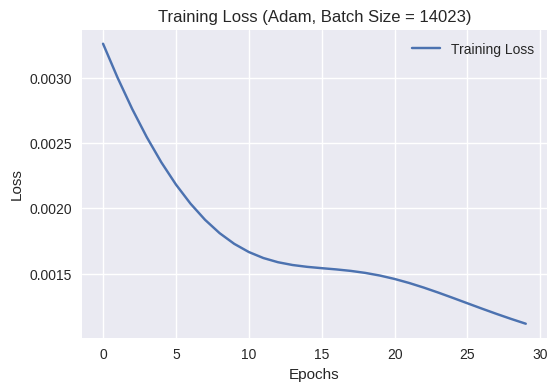

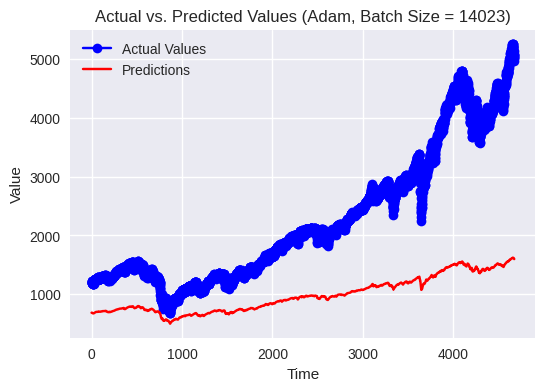

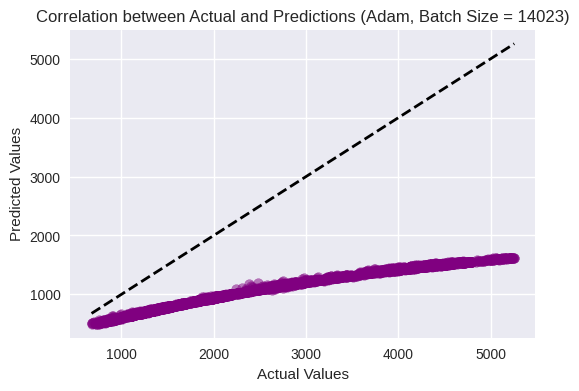

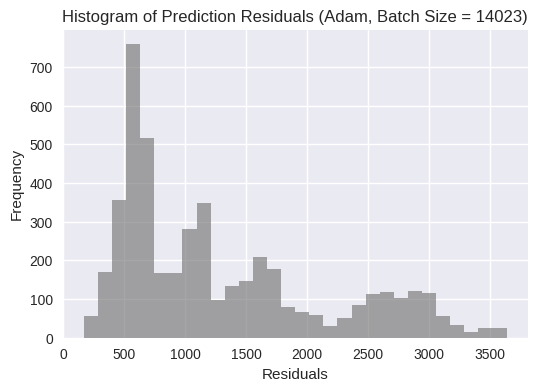

==================== ==================== ==================== ==================== ==================== ==================== ====================

==================== ==================== ==================== ==================== ==================== ==================== ====================


==================== BATCH SIZE = 1024, OPT_ALG = Plain ====================


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 8)                 320       
                                                                 
 dense_8 (Dense)             (None, 8)                 72        
                                                                 
 dense_9 (Dense)             (None, 1)                 9         
                                                                 
Total params: 401 (1.57 KB)
Trainable params: 401 (1.57 KB)
Non-trainable 

<ipython-input-6-38dd5c54a165>:28: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


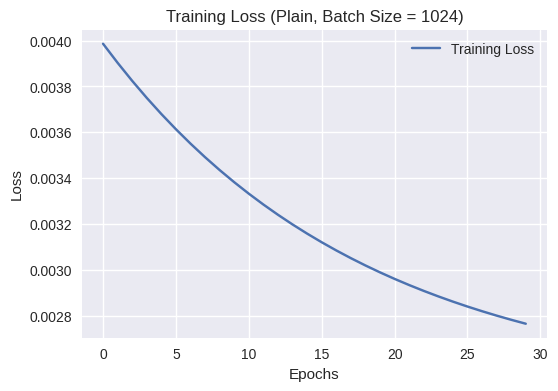

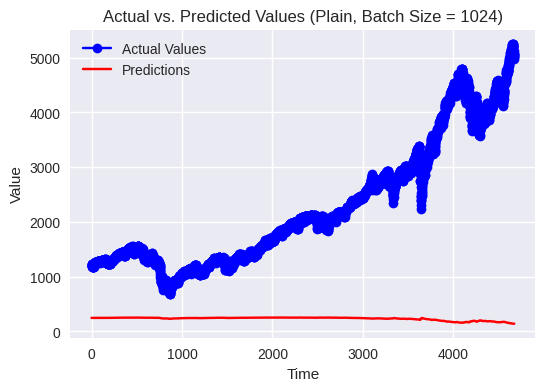

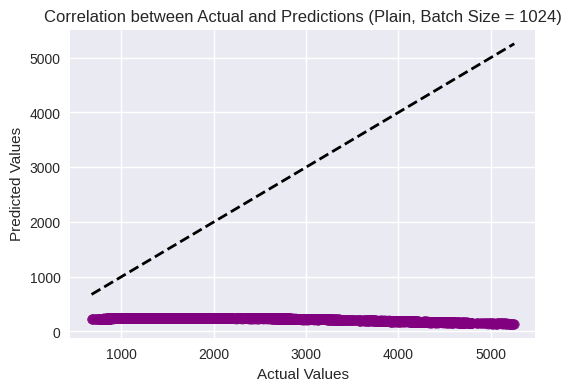

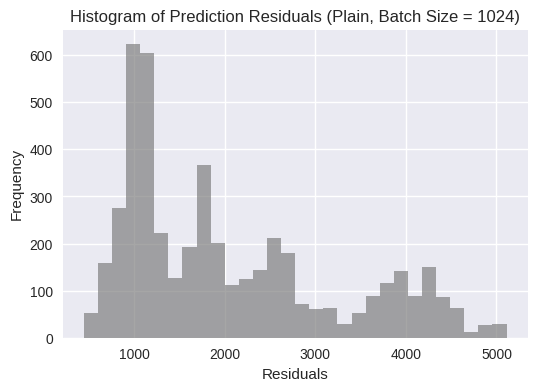

==================== ==================== ==================== ==================== ==================== ==================== ====================

==================== ==================== ==================== ==================== ==================== ==================== ====================


==================== BATCH SIZE = 1024, OPT_ALG = Momentum ====================


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 8)                 320       
                                                                 
 dense_10 (Dense)            (None, 8)                 72        
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 401 (1.57 KB)
Trainable params: 401 (1.57 KB)
Non-trainab

<ipython-input-6-38dd5c54a165>:28: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


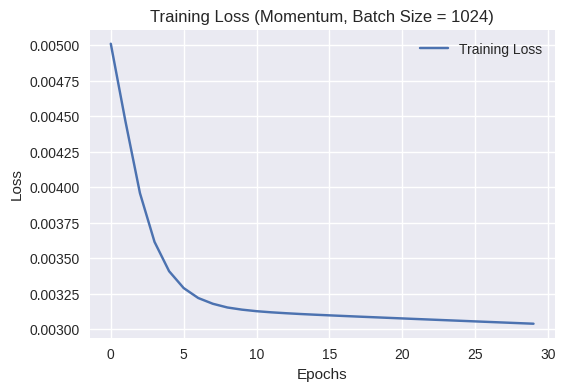

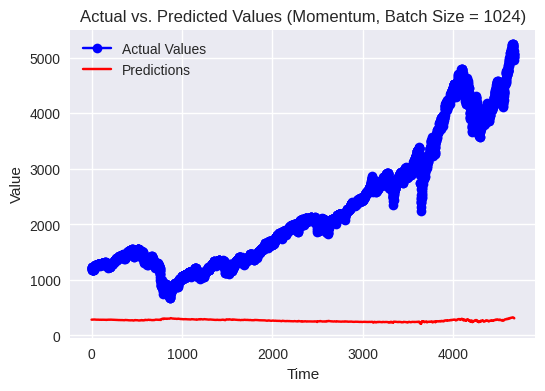

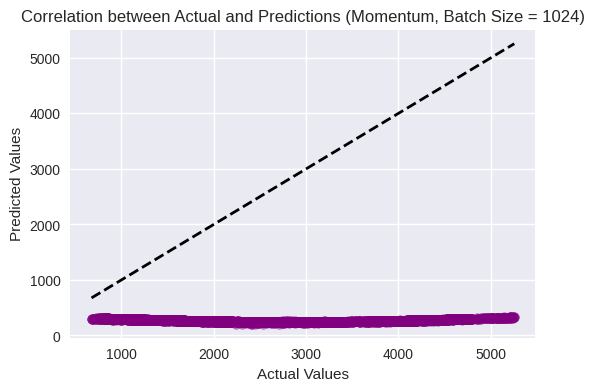

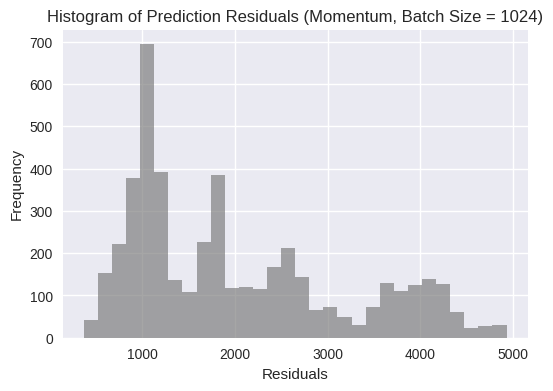

==================== ==================== ==================== ==================== ==================== ==================== ====================

==================== ==================== ==================== ==================== ==================== ==================== ====================


==================== BATCH SIZE = 1024, OPT_ALG = RMSprop ====================


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 8)                 320       
                                                                 
 dense_12 (Dense)            (None, 8)                 72        
                                                                 
 dense_13 (Dense)            (None, 1)                 9         
                                                                 
Total params: 401 (1.57 KB)
Trainable params: 401 (1.57 KB)
Non-trainabl

<ipython-input-6-38dd5c54a165>:28: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


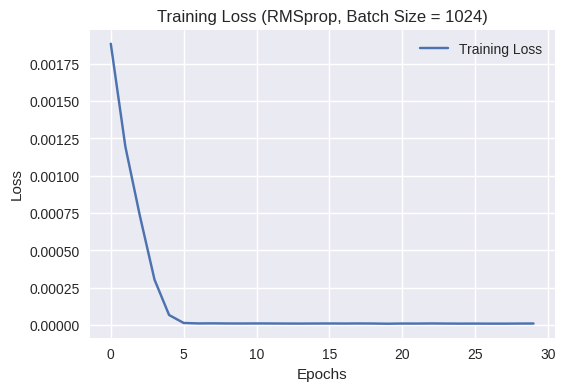

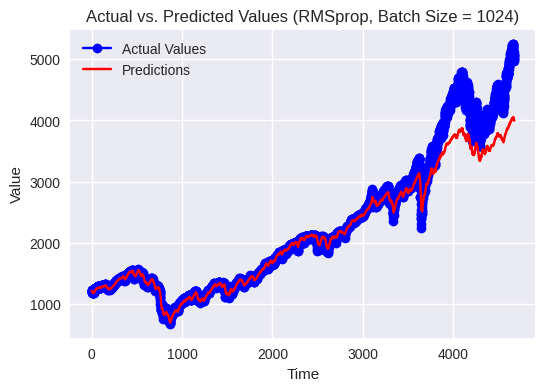

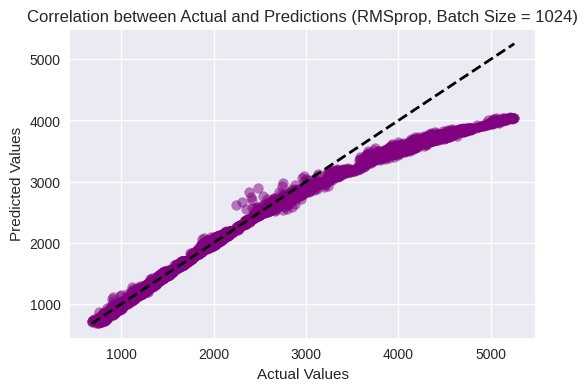

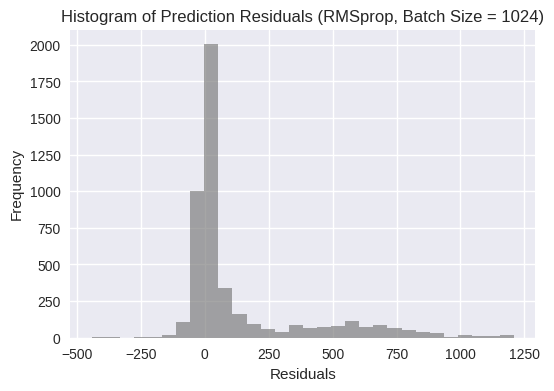

==================== ==================== ==================== ==================== ==================== ==================== ====================

==================== ==================== ==================== ==================== ==================== ==================== ====================


==================== BATCH SIZE = 1024, OPT_ALG = Adam ====================


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_7 (LSTM)               (None, 8)                 320       
                                                                 
 dense_14 (Dense)            (None, 8)                 72        
                                                                 
 dense_15 (Dense)            (None, 1)                 9         
                                                                 
Total params: 401 (1.57 KB)
Trainable params: 401 (1.57 KB)
Non-trainable p

<ipython-input-6-38dd5c54a165>:28: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


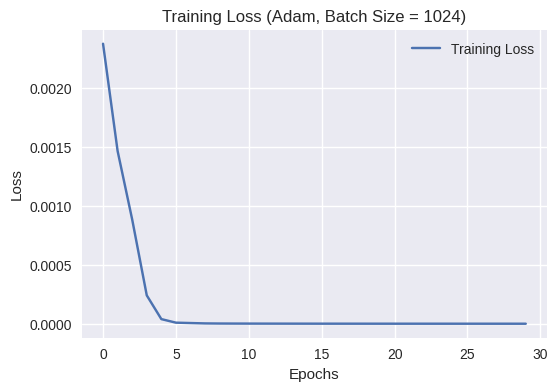

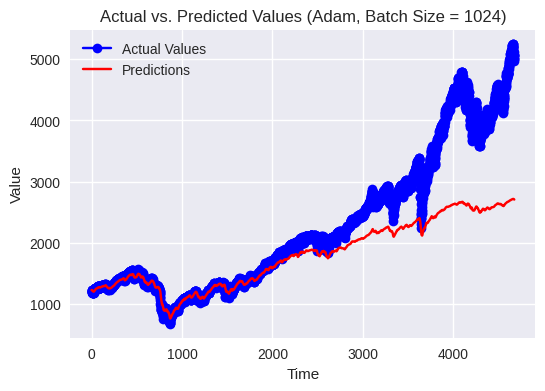

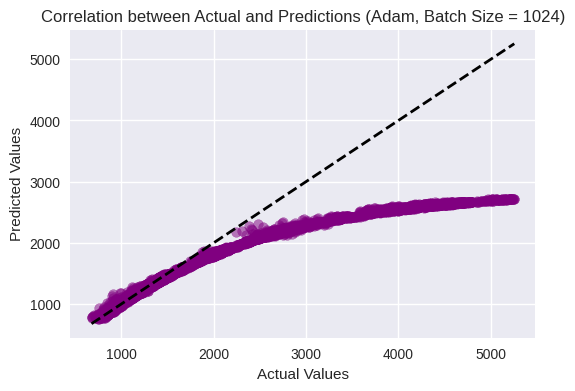

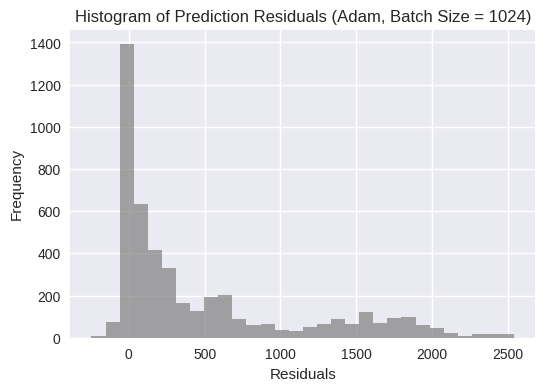

==================== ==================== ==================== ==================== ==================== ==================== ====================

==================== ==================== ==================== ==================== ==================== ==================== ====================


==================== BATCH SIZE = 512, OPT_ALG = Plain ====================


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 8)                 320       
                                                                 
 dense_16 (Dense)            (None, 8)                 72        
                                                                 
 dense_17 (Dense)            (None, 1)                 9         
                                                                 
Total params: 401 (1.57 KB)
Trainable params: 401 (1.57 KB)
Non-trainable p

<ipython-input-6-38dd5c54a165>:28: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


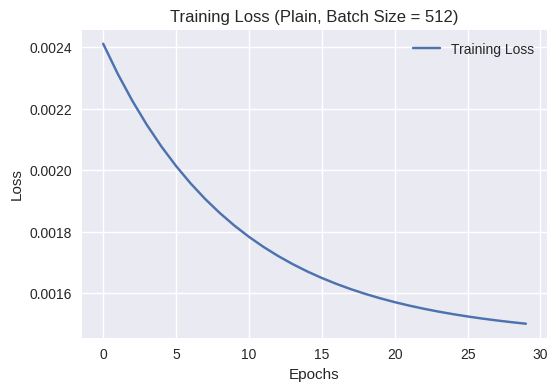

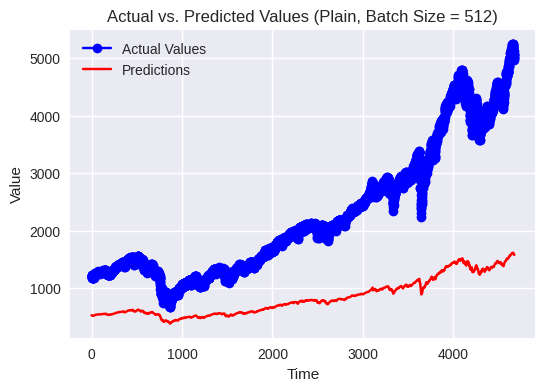

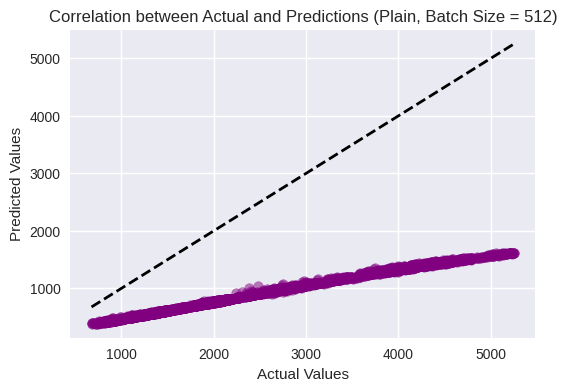

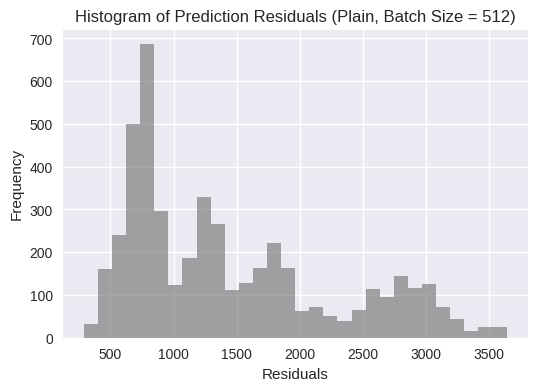

==================== ==================== ==================== ==================== ==================== ==================== ====================

==================== ==================== ==================== ==================== ==================== ==================== ====================


==================== BATCH SIZE = 512, OPT_ALG = Momentum ====================


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 8)                 320       
                                                                 
 dense_18 (Dense)            (None, 8)                 72        
                                                                 
 dense_19 (Dense)            (None, 1)                 9         
                                                                 
Total params: 401 (1.57 KB)
Trainable params: 401 (1.57 KB)
Non-trainabl

<ipython-input-6-38dd5c54a165>:28: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


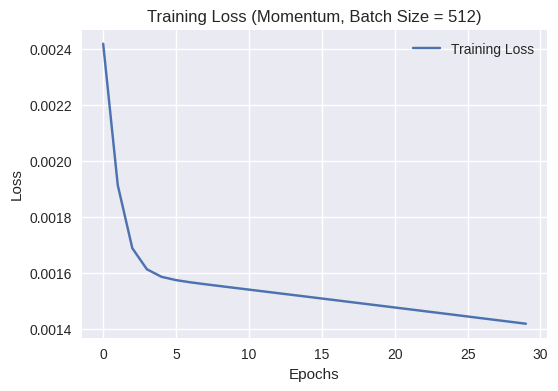

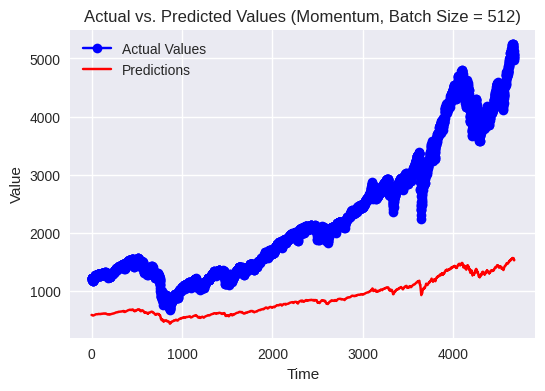

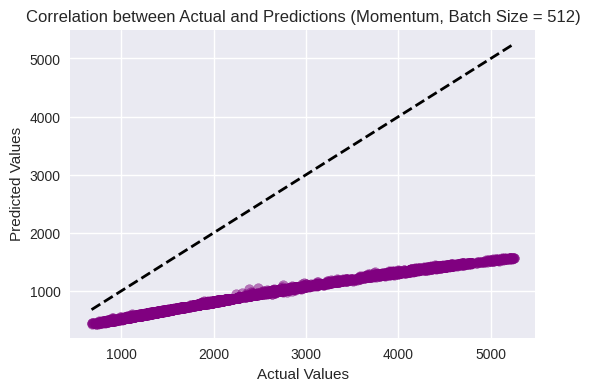

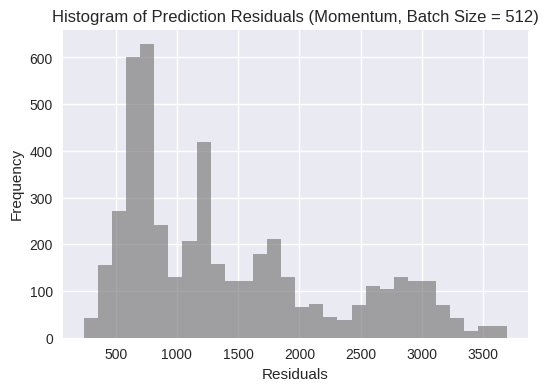

==================== ==================== ==================== ==================== ==================== ==================== ====================

==================== ==================== ==================== ==================== ==================== ==================== ====================


==================== BATCH SIZE = 512, OPT_ALG = RMSprop ====================


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 8)                 320       
                                                                 
 dense_20 (Dense)            (None, 8)                 72        
                                                                 
 dense_21 (Dense)            (None, 1)                 9         
                                                                 
Total params: 401 (1.57 KB)
Trainable params: 401 (1.57 KB)
Non-trainabl

<ipython-input-6-38dd5c54a165>:28: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


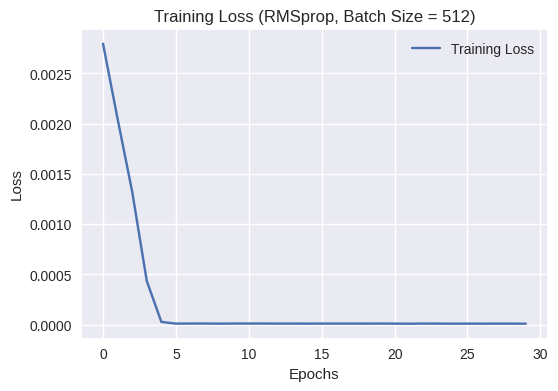

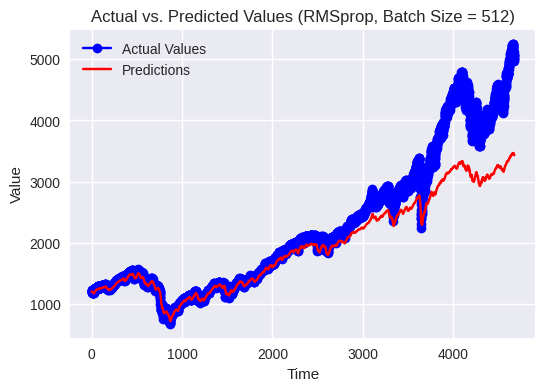

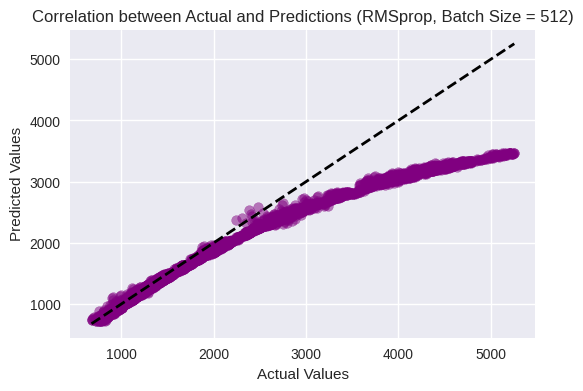

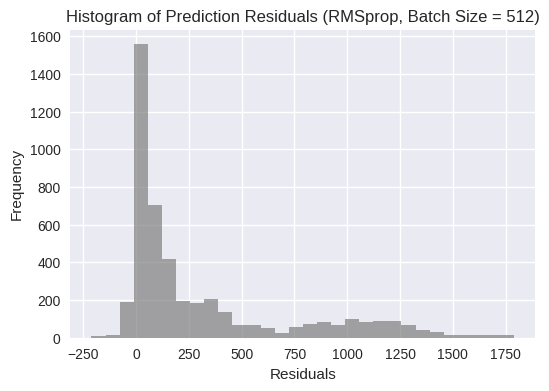

==================== ==================== ==================== ==================== ==================== ==================== ====================

==================== ==================== ==================== ==================== ==================== ==================== ====================


==================== BATCH SIZE = 512, OPT_ALG = Adam ====================


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_11 (LSTM)              (None, 8)                 320       
                                                                 
 dense_22 (Dense)            (None, 8)                 72        
                                                                 
 dense_23 (Dense)            (None, 1)                 9         
                                                                 
Total params: 401 (1.57 KB)
Trainable params: 401 (1.57 KB)
Non-trainable p

<ipython-input-6-38dd5c54a165>:28: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


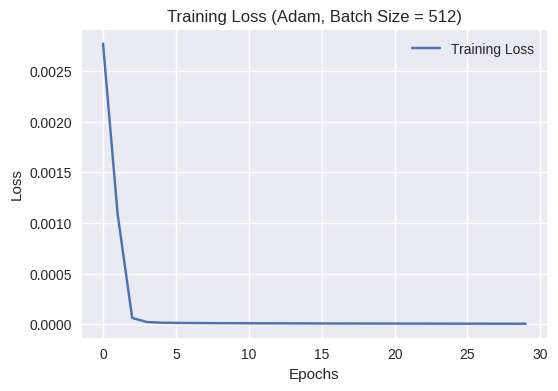

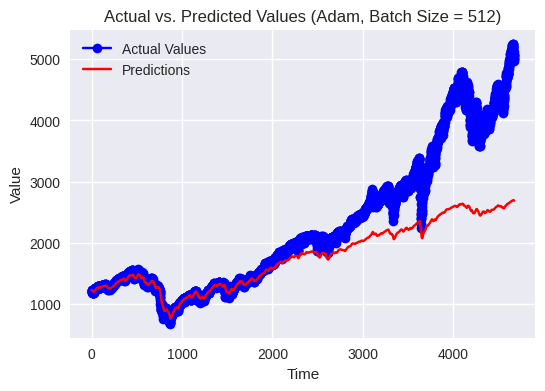

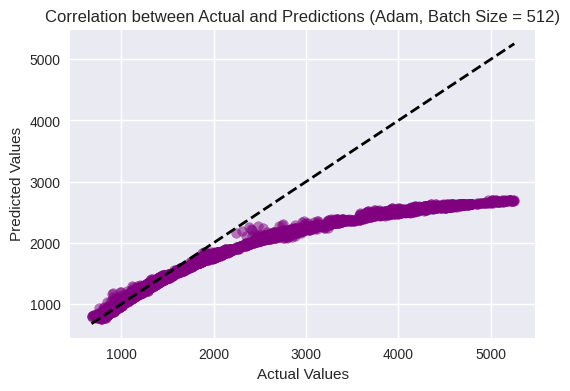

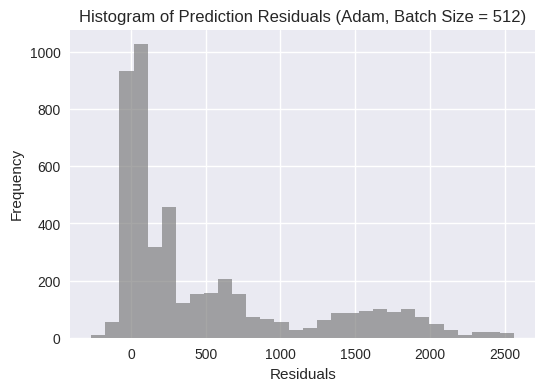

==================== ==================== ==================== ==================== ==================== ==================== ====================

==================== ==================== ==================== ==================== ==================== ==================== ====================


==================== BATCH SIZE = 128, OPT_ALG = Plain ====================


Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 8)                 320       
                                                                 
 dense_24 (Dense)            (None, 8)                 72        
                                                                 
 dense_25 (Dense)            (None, 1)                 9         
                                                                 
Total params: 401 (1.57 KB)
Trainable params: 401 (1.57 KB)
Non-trainable 

<ipython-input-6-38dd5c54a165>:28: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


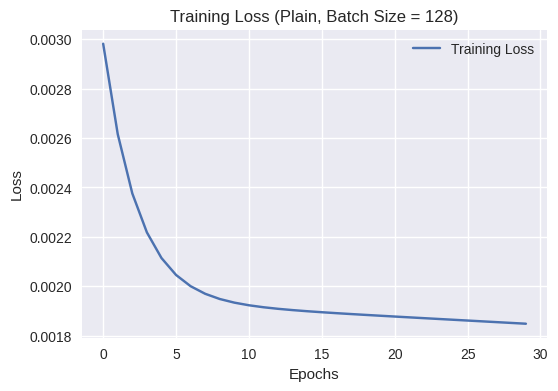

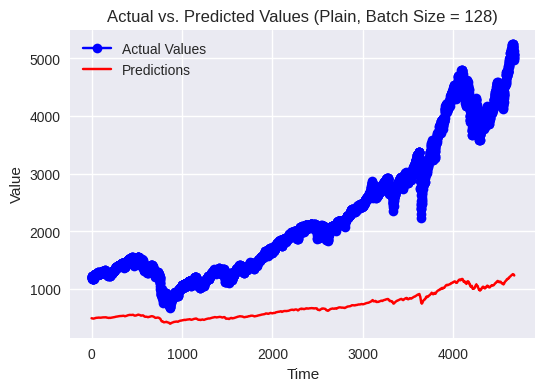

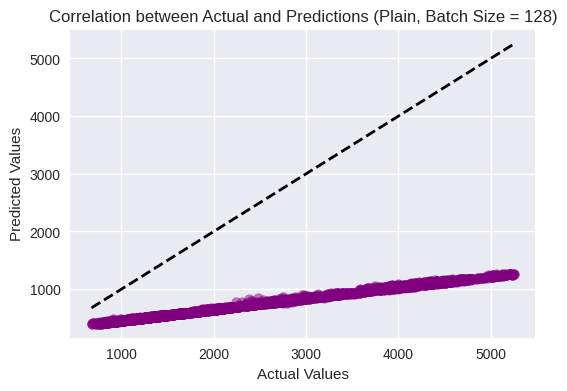

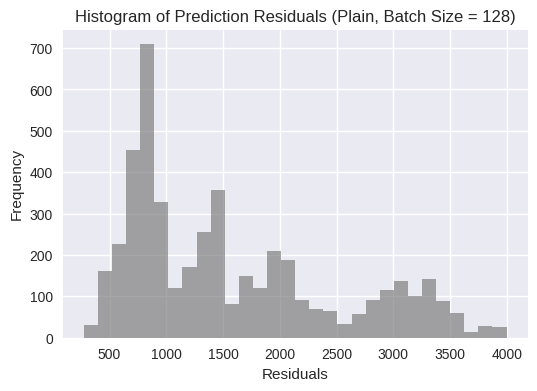

==================== ==================== ==================== ==================== ==================== ==================== ====================

==================== ==================== ==================== ==================== ==================== ==================== ====================


==================== BATCH SIZE = 128, OPT_ALG = Momentum ====================


Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_13 (LSTM)              (None, 8)                 320       
                                                                 
 dense_26 (Dense)            (None, 8)                 72        
                                                                 
 dense_27 (Dense)            (None, 1)                 9         
                                                                 
Total params: 401 (1.57 KB)
Trainable params: 401 (1.57 KB)
Non-trainab

<ipython-input-6-38dd5c54a165>:28: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


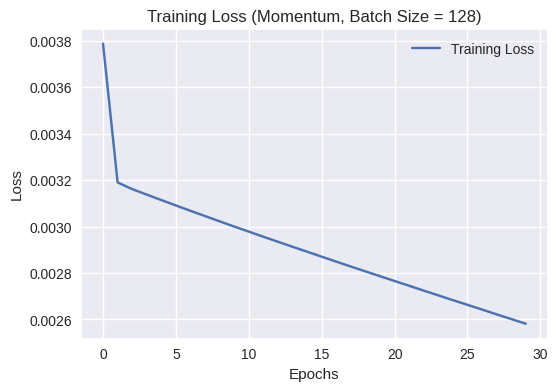

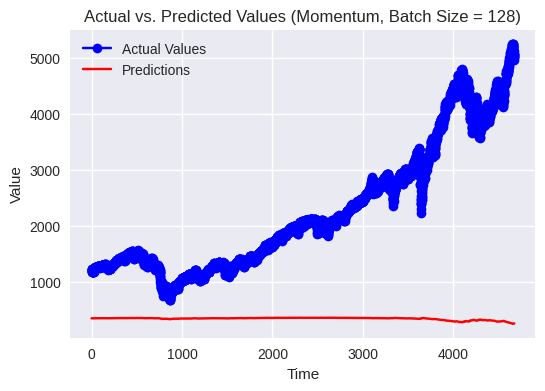

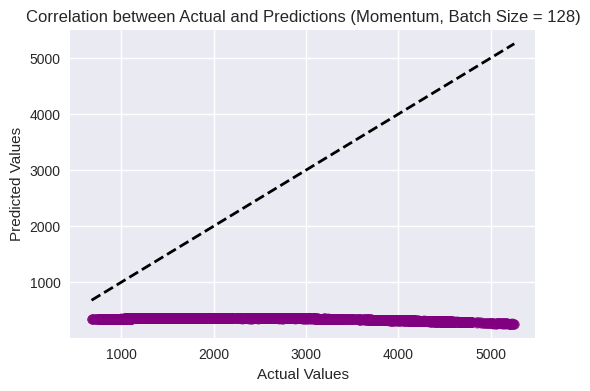

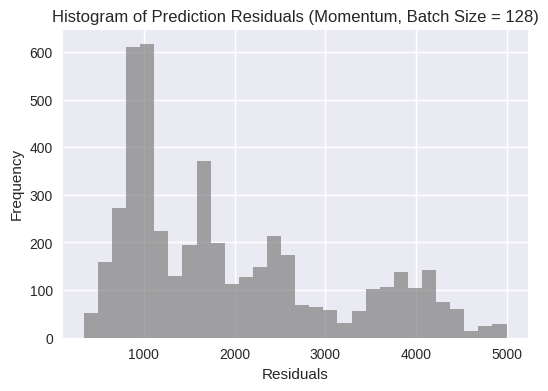

==================== ==================== ==================== ==================== ==================== ==================== ====================

==================== ==================== ==================== ==================== ==================== ==================== ====================


==================== BATCH SIZE = 128, OPT_ALG = RMSprop ====================


Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_14 (LSTM)              (None, 8)                 320       
                                                                 
 dense_28 (Dense)            (None, 8)                 72        
                                                                 
 dense_29 (Dense)            (None, 1)                 9         
                                                                 
Total params: 401 (1.57 KB)
Trainable params: 401 (1.57 KB)
Non-trainabl

<ipython-input-6-38dd5c54a165>:28: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


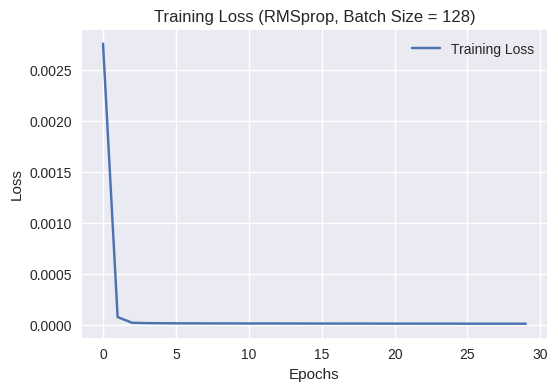

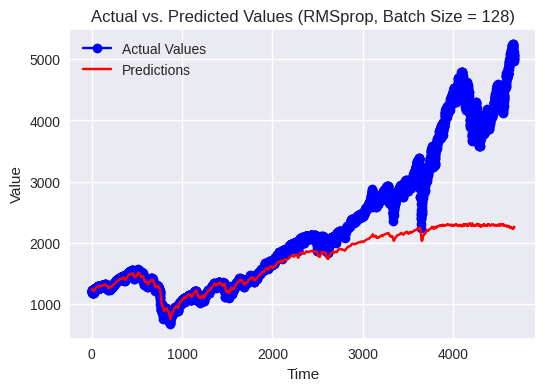

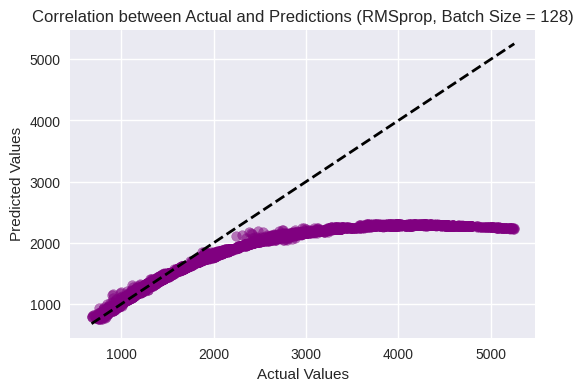

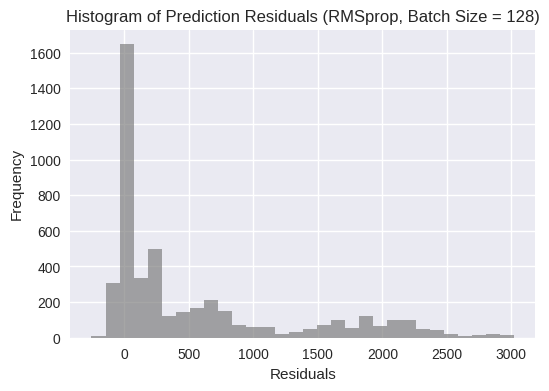

==================== ==================== ==================== ==================== ==================== ==================== ====================

==================== ==================== ==================== ==================== ==================== ==================== ====================


==================== BATCH SIZE = 128, OPT_ALG = Adam ====================


Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_15 (LSTM)              (None, 8)                 320       
                                                                 
 dense_30 (Dense)            (None, 8)                 72        
                                                                 
 dense_31 (Dense)            (None, 1)                 9         
                                                                 
Total params: 401 (1.57 KB)
Trainable params: 401 (1.57 KB)
Non-trainable p

<ipython-input-6-38dd5c54a165>:28: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


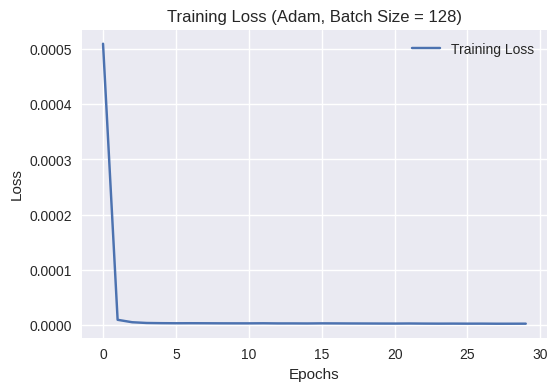

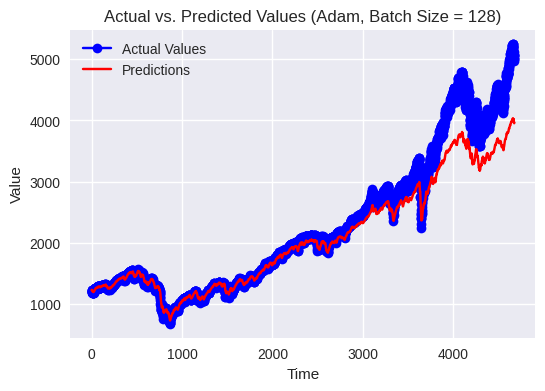

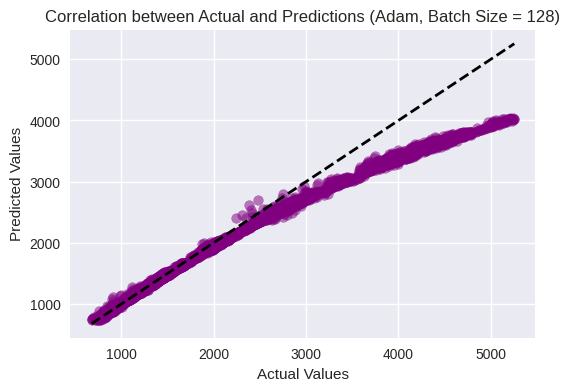

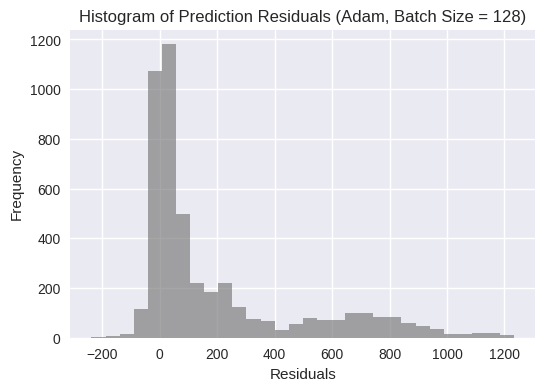

==================== ==================== ==================== ==================== ==================== ==================== ====================

==================== ==================== ==================== ==================== ==================== ==================== ====================




In [ ]:
for size in batch_sizes:
  opt_algs = fetch_algs()
  for alg in opt_algs:
    print(f'==================== BATCH SIZE = {size}, OPT_ALG = {alg.name} ====================\n\n')
    model = model_regression()
    model.compile(
        loss='log_cosh',
        optimizer=alg,
        metrics=['mean_squared_error','mean_absolute_error', 'mean_absolute_percentage_error']
        )
    model.summary()

    history = model.fit(x_train, y_train, batch_size = size, epochs = 30)
    # standard deviations of metrics
    loss_stdev = stdev(history.history['loss'])
    mse_stdev = stdev(history.history['mean_squared_error'])
    mae_stdev = stdev(history.history['mean_absolute_error'])
    mape_stdev = stdev(history.history['mean_absolute_percentage_error'])
    print(f'\n\nLoss St.Dev: {loss_stdev} - MSE St.Dev: {mse_stdev} - MAE Std.Dev: {mae_stdev} - MAPE St.Dev: {mape_stdev}\n\n')

    # unscale the predictions to they can be inserted into to the test data
    scaled_predictions = model.predict(x_test)
    predictions = scaler.inverse_transform(scaled_predictions)
    actual = scaler.inverse_transform(y_test)

    residuals = actual - predictions

    plt.style.use('seaborn')
    # 1. Training & Validation Loss Plot
    plt.figure(figsize=(6, 4))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.title(f'Training Loss ({alg.name}, Batch Size = {size})')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # 2. Actual vs Predicted - Line Chart
    plt.figure(figsize=(6, 4))
    plt.plot(actual, label='Actual Values', linestyle='-', marker='o', color='b')
    plt.plot(predictions, label='Predictions', linestyle='-', marker='x', color='r')
    plt.title(f'Actual vs. Predicted Values ({alg.name}, Batch Size = {size})')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

    # 3. Actual vs Predicted - Scatter Plot
    plt.figure(figsize=(6, 4))
    plt.scatter(actual, predictions, alpha=0.5, color='purple')
    plt.title(f'Correlation between Actual and Predictions ({alg.name}, Batch Size = {size})')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.plot([min(actual), max(actual)], [min(actual), max(actual)], 'k--', lw=2)  # Line of perfect fit
    plt.show()

    # 4. Histogram of Residuals
    residuals = actual.flatten() - predictions.flatten()
    plt.figure(figsize=(6, 4))
    plt.hist(residuals, bins=30, color='gray', alpha=0.7)
    plt.title(f'Histogram of Prediction Residuals ({alg.name}, Batch Size = {size})')
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.show()

    print(f'==================== ==================== ==================== ==================== ==================== ==================== ====================\n')
    print(f'==================== ==================== ==================== ==================== ==================== ==================== ====================\n\n')

